<a href="https://colab.research.google.com/github/PUJANLAMA/2501394_Pujan/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes_.csv")
#Number of Rows and Columns
df.shape
#Data Types
df.info()
#Summary Statistics
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Checking missing and duplicated values
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values) #Ouput shows no null values
df.duplicated().sum() #Ouput shows no duplicated values

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


np.int64(0)

In [4]:
#Separate the feature matrix (X) and target variable (Y).
X = df.drop(columns=['Outcome']).values
Y = df['Outcome'].values

#Define a function for train-test split from scratch
def train_test_split_scratch(X, Y, test_size=0.3, random_seed=42):
  """
  Splits dataset into train and test sets.
  Arguments:
  X: np.ndarray
     Feature Matrix
  Y: np.ndarray
     Target array
  test_size: float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
random_seed: int
    Seed for reproducibility
Returns:
X_train, X_test, Y_train, Y_test : np.ndarray
    Training and testing splits of features and target.
  """

  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) #Shuffle the indices
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  Y_train, Y_test = Y[train_indices], Y[test_indices]
  return X_train, X_test, Y_train, Y_test

#Perform the train-test split
X_train, X_test, Y_train, Y_test = train_test_split_scratch(X, Y, test_size = 0.3)

#Output shapes to verify
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (538, 8)
Shape of X_test:  (230, 8)
Shape of Y_train:  (538,)
Shape of Y_test:  (230,)


In [5]:
#Calculate Euclidean Distance

def euclidean_distance(point1, point2):
  """
  Calculate the euclidean distance between two points in n dimensional space
  Arguments:
  point1 : np.ndarray
    The first point as a numpy array.
  point2 : np.ndarray
    The second point as a numpy array.
  Returns:
    float
    The Euclidean distance between the two points.
  Raises:
  ValueError: If the input points do not have the same dimensionality.
  """

  #Check if the points are of the same dimensionality
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimesionality to calculate the eucledian distance.")
  #Calculate the euclidean distance
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

In [6]:
#Function for kNN prediction for a single query

def knn_predict_single(query, X_train, Y_train, k=3):
  """
  Predict the class label for a single query using the K-nearest neighbors algorithm.

  Arguments:
  query: np.ndarray
      The query point for which the prediction is to be made.
  X_train: np.ndarray
      The training feature matrix.
  Y_train: np.ndarray
      The training labels.
  k: int, optional
      The number of nearest neighbour to consider (default is 3).

  Returns: int
      The predicted class label for the query.
  """

  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = Y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

In [7]:
#Function to test kNN for all test_samples

def knn_predict(X_test, X_train, Y_train, k=3):
  """
  Predict the class labels for all test samples using the K-nearest neighbors algorithm.
  Arguments:
    X_test : np.ndarray
      The test feature matrix.
    X_train : np.ndarray
      The training feature matrix.
    Y_train : np.ndarray
      The training labels.
    k : int, optional
      The number of nearest neighbors to consider (default is 3).
  Returns: np.ndarray
      An array of predicted class labels for the test samples.
  """
  predictions = [knn_predict_single(x, X_train, Y_train, k) for x in X_test]
  return np.array(predictions)


In [8]:
#Function to predict the accuracy of predictions

def compute_accuracy(Y_true, Y_pred):
  """
  Compute the accuracy of predictions.
  Arguments:
  Y_true : np.ndarray ; The true labels.
  Y_pred : np.ndarray; The predicted labels.
  Returns:
  float : The accuracy as a percentage (0 to 100).
  """
  correct_predictions = np.sum(Y_true == Y_pred)
  total_predictions = len(Y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

  #Perform prediction on the entire test set

try:
  #Make predictions on the entire test set
  predictions = knn_predict(X_test, X_train, Y_train, k=3)
  #Compute the accuracy
  accuracy = compute_accuracy(Y_test, predictions)
  print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
  print(f"An unexpected error occurred during prediction or accuracy computation: {e}")


Accuracy of the KNN model on the test set: 67.39%


In [9]:
#Scaling the feature matrix X and using the scaled data to test the kNN classifier

def standardize_train_test(X_train, X_test):
  """
  Standardize features using training set statistics.

  Arguments:
  X_train: np.ndarray
      The training feature matrix.
  X_test: np.ndarray
      The test feature matrix.
  Returns:
  X_train_scaled, X_test_scaled : np.ndarray
      Scaled training and test features matrices
  """

  mean = np.mean(X_train, axis=0)
  std = np.std(X_train, axis=0)
  std[std==0] = 1

  X_train_scaled = (X_train - mean) / std
  X_test_scaled = (X_test - mean) / std

  return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = standardize_train_test(X_train, X_test)

predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, Y_train, k=3)

scaled_accuracy = compute_accuracy(Y_test, predictions_scaled)

print(f"Accuracy of the KNN model with the scaled data: {scaled_accuracy:.2f}%")

#After scaling the feature matrix, the accuracy of the kNN classifier improved. This is because kNN classifier relies on Euclidean distance, and scaling ensures that all
#features contribute equally to distance calculations. Without scaling, features with larger numerical ranges dominates the distance metric, leading to suboptimal neighbour selection.


Accuracy of the KNN model with the scaled data: 70.87%


In [10]:
#Experimentation with k

import time

k_values = range(1, 16)
original_accuracy = []
scaled_accuracy = []
original_time = []
scaled_time = []

for k in k_values:
  start_time = time.time()
  Y_pred_original = knn_predict(X_test, X_train, Y_train, k=k)
  end_time = time.time()

  original_acc = compute_accuracy(Y_test, Y_pred_original)
  original_accuracy.append(original_acc)
  original_time.append(end_time - start_time)

  start_time = time.time()
  Y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, Y_train, k=k)
  end_time = time.time()

  scaled_acc = compute_accuracy(Y_test, Y_pred_scaled)
  scaled_accuracy.append(scaled_acc)
  scaled_time.append(end_time - start_time)

  print(f"k={k:2d} | "
        f"Acc (orig)={original_acc:.2f}% | "
        f"Acc (scaled)={scaled_acc:.2f}%")


k= 1 | Acc (orig)=68.70% | Acc (scaled)=63.48%
k= 2 | Acc (orig)=72.61% | Acc (scaled)=66.09%
k= 3 | Acc (orig)=67.39% | Acc (scaled)=70.87%
k= 4 | Acc (orig)=72.17% | Acc (scaled)=68.70%
k= 5 | Acc (orig)=68.70% | Acc (scaled)=70.00%
k= 6 | Acc (orig)=70.00% | Acc (scaled)=69.13%
k= 7 | Acc (orig)=69.13% | Acc (scaled)=69.57%
k= 8 | Acc (orig)=71.30% | Acc (scaled)=68.70%
k= 9 | Acc (orig)=70.00% | Acc (scaled)=69.57%
k=10 | Acc (orig)=71.74% | Acc (scaled)=69.57%
k=11 | Acc (orig)=73.04% | Acc (scaled)=70.87%
k=12 | Acc (orig)=73.91% | Acc (scaled)=72.17%
k=13 | Acc (orig)=74.35% | Acc (scaled)=71.30%
k=14 | Acc (orig)=72.61% | Acc (scaled)=71.30%
k=15 | Acc (orig)=73.91% | Acc (scaled)=73.91%


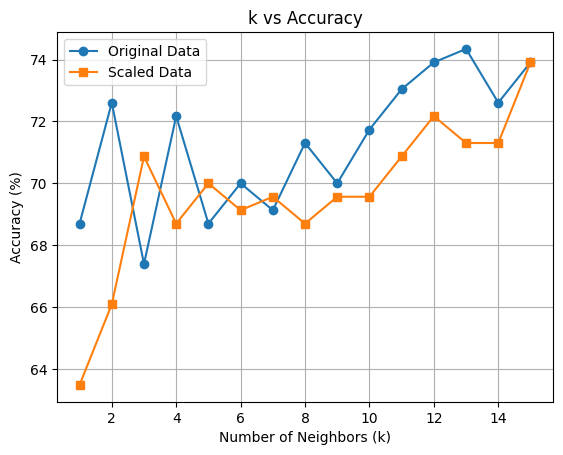

In [11]:
#k vs Accuracy
plt.figure()
plt.plot(k_values, original_accuracy, marker='o', label='Original Data')
plt.plot(k_values, scaled_accuracy, marker='s', label='Scaled Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

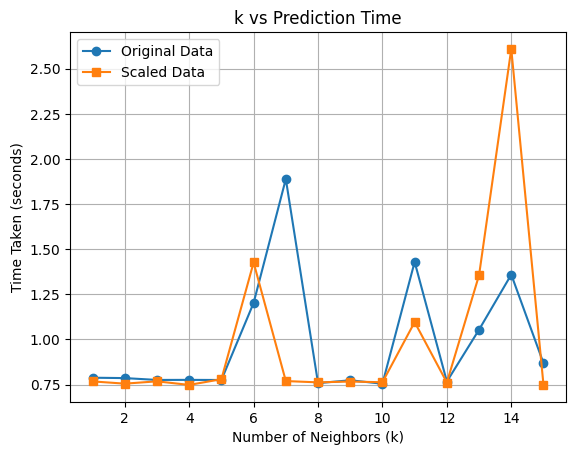

In [12]:
#k vs Time
plt.figure()
plt.plot(k_values, original_time, marker='o', label='Original Data')
plt.plot(k_values, scaled_time, marker='s', label='Scaled Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs Prediction Time')
plt.legend()
plt.grid(True)
plt.show()
